In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pandas import ExcelWriter
from pandas import ExcelFile

- Section 1 - Part 1

In [677]:
address='/Users/Ali/Downloads/DOB_Job_Application_Filings.csv'
df=pd.read_csv(address)
df.head()

/opt/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3058: DtypeWarning: Columns (5,6,13,14,20,21,32,38,59,60,68,78,79) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,Job #,Doc #,Borough,House #,Street Name,Block,Lot,Bin #,Job Type,Job Status,...,SPECIAL_ACTION_STATUS,SPECIAL_ACTION_DATE,BUILDING_CLASS,JOB_NO_GOOD_COUNT,GIS_LATITUDE,GIS_LONGITUDE,GIS_COUNCIL_DISTRICT,GIS_CENSUS_TRACT,GIS_NTA_NAME,GIS_BIN
0,302181886,1,BROOKLYN,1414,WEST 4 STREET,6580,17,3424450,NB,X,...,N,NaN,D1,0,40.611742,-73.978426,44.0,434.0,Bensonhurst East,3173422.0
1,401620527,1,QUEENS,166-16,20 AVENUE,5751,12,4128968,A1,X,...,N,NaN,A1,0,40.779929,-73.797096,19.0,1017.0,Ft. Totten-Bay Terrace-Clearview,4128968.0
2,302343765,1,BROOKLYN,336,ST MARKS AVENUE,1153,23,3396401,A2,X,...,N,NaN,C1,0,40.677698,-73.964553,35.0,205.0,Prospect Heights,3396401.0
3,401624925,1,QUEENS,218-23,56 AVENUE,7404,124,4159229,A1,X,...,N,NaN,A1,0,40.751919,-73.761160,23.0,1441.0,Bayside-Bayside Hills,4159229.0
4,103828146,1,MANHATTAN,317,MADISON AVENUE,1277,20,1090825,A2,R,...,N,NaN,O4,0,40.753001,-73.978936,4.0,94.0,Midtown-Midtown South,1035349.0


In [691]:
mask1=df['Doc #']==1
df_doc1=df[mask1]

In [693]:
#df_doc1.groupby(['Job #']).sum()
#df_doc1['Job #'].value_counts()
len(df_doc1)

1527839

In [699]:
df_doc1.drop_duplicates(subset='Job #',keep='last',inplace=True)
len(df_doc1)

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


1527798

In [700]:
from datetime import datetime

result = [] 
for date in df_doc1['Pre- Filing Date']:
    
    objDate=datetime.strptime(date, '%m/%d/%Y')
    file_year=datetime.strftime(objDate,'%Y')
    result.append(file_year) 
df_doc1['file_year']=result

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':


In [701]:
mask2=df_doc1['file_year']=='2018'
df_2018=df_doc1[mask2]

In [703]:
unique_job_2018=len(df_2018)
unique_job_2018

84037

- Section 1 - Part 2

In [704]:
mask3=(df_doc1['file_year']>='2013') & (df_doc1['file_year']<='2018')
df_2013=df_doc1[mask3] 
df_2013.shape

(546391, 97)

In [254]:
df_2013['Owner Type'].unique()

array(['PARTNERSHIP', "OTHER GOV'T AGENCY", 'INDIVIDUAL', 'CORPORATION',
       'OTHER', 'CONDO/CO-OP', 'NYC AGENCY', 'NYCHA/HHC', 'DOE', 'HPD',
       'NYCHA', 'NY STATE', 'HHC', 'DCAS'], dtype=object)

In [705]:
Prop=df_2013.groupby(['Borough'])['Owner Type'].value_counts(normalize=True)

print(Prop['BROOKLYN','CORPORATION']+Prop['BROOKLYN','PARTNERSHIP'])
print(Prop['MANHATTAN','CORPORATION']+Prop['MANHATTAN','PARTNERSHIP'])
print(Prop['QUEENS','CORPORATION']+Prop['QUEENS','PARTNERSHIP'])
print(Prop['BRONX','CORPORATION']+Prop['BRONX','PARTNERSHIP'])
print(Prop['STATEN ISLAND','CORPORATION']+Prop['STATEN ISLAND','PARTNERSHIP'])

0.48112714117595784
0.7700307306688642
0.40593856255129557
0.5342074336935733
0.29053873849846645


In [706]:
ratio=0.7700307306688642/0.5342074336935733
ratio

1.4414451804700297

- Section 1 - Part 3

In [707]:
df_2018['Job Type'].unique()

array(['A2', 'A1', 'PA', 'DM', 'NB', 'A3', 'SI', 'SC'], dtype=object)

In [734]:
Prop2=df_2018.groupby(['Borough'])['Job Type'].value_counts(normalize=False)
New_build=Prop2[:,'NB']
NB=New_build.to_frame()
Sqr_mil = [42.10, 70.82, 22.83, 108.53,58.37] # captured from wikipedia
NB['Sqr_mil']=Sqr_mil
NB['ratio']=NB['Job Type']/NB['Sqr_mil']
NB.sort_values(by=['ratio'],ascending=False,inplace=True)


In [733]:
ratio2=NB.iloc[0]['ratio']/NB.iloc[1]['ratio']
ratio2

1.280480189557908

- Section 1 - Part 4

In [335]:
df_2013['Job Type'].unique()


array(['A2', 'A3', 'PA', 'A1', 'NB', 'DM', 'SI', 'SC', 'SG'], dtype=object)

In [735]:
mask4=(df_2013['Existing Occupancy']=='RES') & (df_doc1['Job Type']=='A1')
df_subset=df_2013[mask4]

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  


In [737]:
feat_sub=['Existing Dwelling Units','Proposed Dwelling Units']
df_subset=df_subset[feat_sub]
df_subset.dropna(inplace=True)
df_subset.shape
df_subset['Proposed Dwelling Units']=df_subset['Proposed Dwelling Units'].astype('int64')
df_subset['Existing Dwelling Units']=df_subset['Existing Dwelling Units'].astype('int64')
mask5=df_subset['Proposed Dwelling Units']>df_subset['Existing Dwelling Units']
df_sub_inc=df_subset[mask5]
ratio3=len(df_sub_inc)/len(df_subset)
ratio3

0.33969699623434624

- Section 1 - Part 5

In [375]:
mask6=df_2013['Borough']=='MANHATTAN'
df_manh=df_2013[mask6]
df_manh.shape

(232992, 97)

In [740]:
Ser_Man=df_manh['Existing Occupancy'].value_counts(normalize=True)
Ser_Man['RES']

0.3187542440891413

- Section 1 - Part 6

In [741]:
mask7=df_2013['Borough']=='QUEENS'
df_QUEENS=df_2013[mask7]
print(df_QUEENS.shape)
no_succ_QUEENS=df_QUEENS['Fully Permitted'].isnull().sum()
succ_QUEENS=len(df_QUEENS)-no_succ_QUEENS
print(succ_QUEENS)

mask8=df_2013['Borough']=='BRONX'
df_BRONX=df_2013[mask8]
print(df_BRONX.shape)
no_succ_BRONX=df_BRONX['Fully Permitted'].isnull().sum()
succ_BRONX=len(df_BRONX)-no_succ_BRONX
print(succ_BRONX)

(102348, 97)
80851
(43397, 97)
34139


In [742]:
observed_BRONX = succ_BRONX
succ_ratio_QUEENS = succ_QUEENS/len(df_QUEENS) 
expected_BRONX = succ_ratio_QUEENS * len(df_BRONX)
List_observed_BRONX=[observed_BRONX]*len(df_BRONX)
List_expected_BRONX=[expected_BRONX]*len(df_BRONX)

In [743]:
import scipy.stats as stats
from scipy.stats import chisquare
stats.chisquare(f_obs= List_observed_BRONX,  
                f_exp= List_expected_BRONX )

Power_divergenceResult(statistic=25874.43202549801, pvalue=1.0)

- Section 1 - Part 7

In [745]:
mask9=df_2013['Borough']=='BROOKLYN'
df_BROOKLYN=df_2013[mask9]
df_BROOKLYN.shape

(137658, 97)

In [746]:
feat_BROOKLYN=['Fully Permitted','Pre- Filing Date','file_year']
df_BROOKLYN=df_BROOKLYN[feat_BROOKLYN]
print(df_BROOKLYN.shape)
df_BROOKLYN.dropna(inplace=True)
print(df_BROOKLYN.shape)

(137658, 3)
(105019, 3)


In [747]:
result=[]
for date in df_BROOKLYN['Pre- Filing Date']:
    
    objDate=datetime.strptime(date, '%m/%d/%Y')
    result.append(objDate)
df_BROOKLYN['prefile']=result

In [748]:
result=[]
for date in df_BROOKLYN['Fully Permitted']:
    
    objDate=datetime.strptime(date, '%m/%d/%Y')
    result.append(objDate)
df_BROOKLYN['permit']=result

In [749]:
df_BROOKLYN['interval']=df_BROOKLYN['permit']-df_BROOKLYN['prefile']

In [750]:
df_BROOKLYN['interval']=(df_BROOKLYN['interval'] / np.timedelta64(1, 'D')).astype(int)

In [751]:
df_BROOKLYN['file_year']=df_BROOKLYN['file_year'].astype(int)
mask10=df_BROOKLYN['interval']>=0
df_BROOKLYN=df_BROOKLYN[mask10]

In [752]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn import preprocessing

X=df_BROOKLYN['file_year'].values.reshape(-1, 1)
y=df_BROOKLYN['interval']

reg = LinearRegression().fit(X, y)
reg.score(X, y)

0.007995994214466728

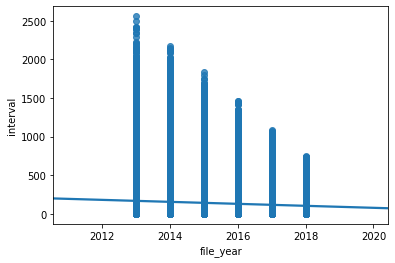

In [495]:
import seaborn as sns
sns.regplot(x="file_year", y="interval", data=df_BROOKLYN)

- Section 2 - Part 2,3

In [758]:
def moveDisks(diskPositions, largestToMove, targetPeg):
    for badDisk in range(largestToMove, len(diskPositions)):

        currentPeg = diskPositions[badDisk]         
        if currentPeg != targetPeg:
            #if the largest disk on the wrong peg

            #sum of the peg numbers is 3, so to find the other one
            otherPeg = 3 - targetPeg - currentPeg

            #before we can move badDisk, we have get the smaller ones out of the way
            moveDisks(diskPositions, badDisk+1, otherPeg)
            
            move(badDisk,currentPeg,targetPeg)
            diskPositions[badDisk]=targetPeg

            #now we can put the smaller ones in the right place
            moveDisks(diskPositions, badDisk+1, targetPeg)
            
            break;
def move(badDisk,currentPeg,targetPeg):
    global c
    print("Move ", badDisk, " from ", currentPeg, " to ", targetPeg)
    c=c+1

In [754]:
c = "global"
c=0
moveDisks([1,2,0,1,1,0,2,2,1,1], 0, 0)
print(c)

659


In [755]:
c=0
moveDisks([1,2,0,1,1,0,2,2,1,1,2,1,1,0,2], 0, 0)
print(c)

21103


- Section 2 - Part 4,5,6

In [779]:
def moveDisks2(diskPositions, largestToMove, targetPeg):
    for badDisk in range(largestToMove, len(diskPositions)):

        currentPeg = diskPositions[badDisk]         
        if currentPeg != targetPeg:
            #if the largest disk on the wrong peg

            otherPeg1 = 4 - targetPeg - currentPeg
            #before we can move badDisk, we have get the smaller ones out of the way
            moveDisks2(diskPositions, badDisk+1, otherPeg1)
            
            move(badDisk,currentPeg,targetPeg)
            diskPositions[badDisk]=targetPeg
            
            #now we can put the smaller ones in the right place
            moveDisks2(diskPositions, badDisk+1, targetPeg)
            
            break;
def move(badDisk,currentPeg,targetPeg):
    global c
    #print("Move ", badDisk, " from ", currentPeg, " to ", targetPeg)
    c=c+1

In [788]:
c=0
moveDisks([1,2,0,1,1,0,2,2,1,1], 0, 0)
print(c)

659


In [783]:
c=0
moveDisks([1,2,0,1,3,0,3,2,1,1,0,3,2], 0, 0)
print(c)

5630


In [787]:
c=0
moveDisks([1,2,0,1,3,0,3,2,1,1,0,3,2,2], 0, 0)
print(c)

11260
